# pylimons: Python Linac MOdeling aNd Simulation

In [1]:
import numpy as np

## Utils

In [2]:
import utils

In [3]:
utils.h

6.62607015e-34

In [4]:
from utils import physical_constants as pconstants

In [5]:
pconstants.c

299792458.0

In [6]:
pconstants.m_e

0.51099895

## Beam

### Particle Class

In [7]:
from beam import Particle

In [8]:
particle = Particle('electron', 10)

In [9]:
particle.get_gamma()

20.569511835591836

In [10]:
particle.get_momentum()

9.98693546955716

In [11]:
particle.print_particle_properties()

particle species  : electron
particle charge   : -1
particle mass     : 0.51099895 MeV/c^2
particle energy   : 10 MeV
particle momentum : 9.98693546955716 MeV/c
particle gamma    : 20.569511835591836
particle beta     : 0.9988175606506312


In [12]:
particle.update_energy(20)

In [13]:
particle.print_particle_properties()

particle species  : electron
particle charge   : -1
particle mass     : 0.51099895 MeV/c^2
particle energy   : 20 MeV
particle momentum : 19.99347093611059 MeV/c
particle gamma    : 40.13902367118367
particle beta     : 0.9996896128022548


### Bunch Class

In [14]:
from beam import Bunch

In [15]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

#Bunch(sepcies, energy, dimension, num_particles, twiss_x, twiss_y)

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [16]:
particles = bunch.generate_transverse_matched_beam_distribution()
print (particles.shape)

(4, 10000)


In [17]:
bunch.particle.print_particle_properties()

particle species  : electron
particle charge   : -1
particle mass     : 0.51099895 MeV/c^2
particle energy   : 10 MeV
particle momentum : 9.98693546955716 MeV/c
particle gamma    : 20.569511835591836
particle beta     : 0.9988175606506312


In [18]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.896801347894918e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.98159585851434e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [19]:
x = particles[0,:]
xp = particles[1,:]

In [20]:
from matplotlib import pyplot as plt

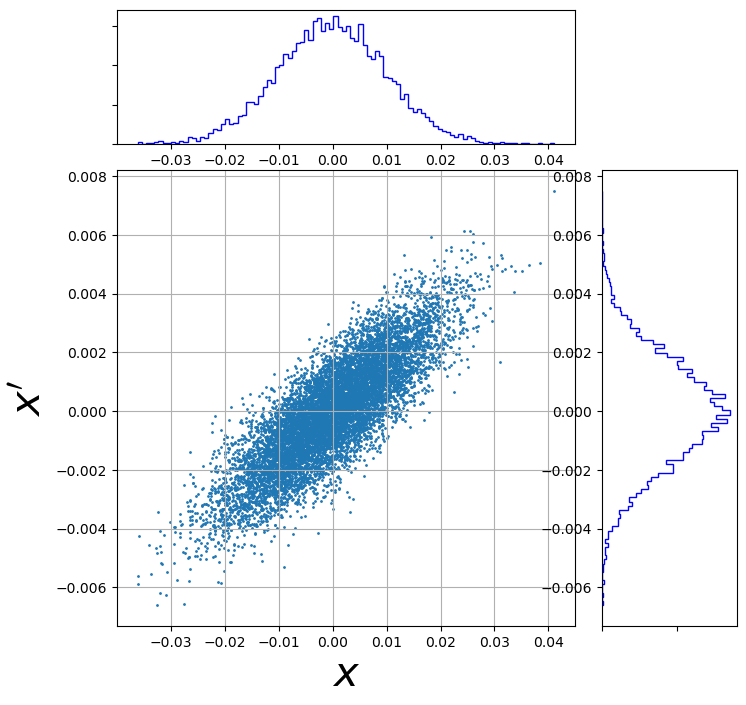

In [21]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')
        
plt.show()

### Random Seed

In [22]:
from elements import *
from beamline import Beamline
from beam import Bunch

In [23]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]
beam_energy = 10
dim = 4
num_particles = 10000

In [24]:
bunch = Bunch('electron', beam_energy, dim, num_particles, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution(seed=134)
x = particles[0, :]
xp = particles[1, :]

In [25]:
bunch2 = Bunch('electron', beam_energy, dim, num_particles, twiss_x, twiss_y)
particles2 = bunch2.generate_transverse_matched_beam_distribution(seed=12234)
nx = particles2[0,:]
nxp = particles2[1,:]

In [26]:
print (x)
print (nx)

[ 0.00211223 -0.00794873  0.00660676 ... -0.00110056  0.00226206
  0.01241433]
[-0.01549313  0.00430801 -0.01616714 ... -0.01320869  0.00159757
  0.00817706]


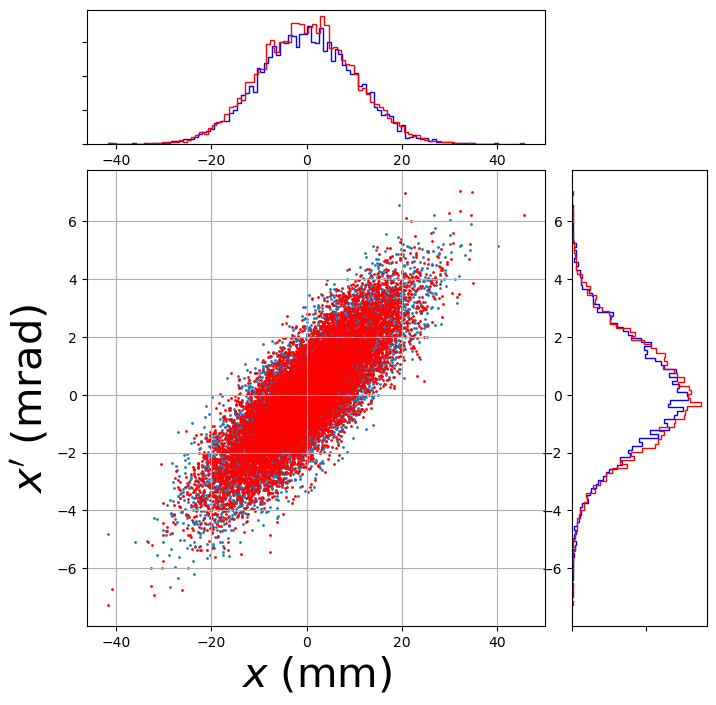

In [27]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Elements

### Element Class (Parent Class)

In [28]:
from elements import Element

In [29]:
quad = Element("qf", "quadrupole", 0.2, 20)

In [30]:
quad.print_element_properties()

element name     : qf
element type     : quadrupole
element length   : 0.2
element strength : 20
element aperture : Not defined


In [31]:
quad2 = quad.element_copy("quad2")

In [32]:
quad2.set_element_property(length=0.4)

In [33]:
quad2.get_element_property("length")

The element's length is 0.4


0.4

In [34]:
quad2.print_element_properties()

element name     : quad2
element type     : quadrupole
element length   : 0.4
element strength : 20
element aperture : Not defined


### Drift Class (Child Class)

In [35]:
from elements import Drift

In [36]:
d1 = Drift("d1", "drift", 10)

In [37]:
d1.print_element_properties()

element name     : d1
element type     : drift
element length   : 10
element strength : 0
element aperture : Not defined


In [38]:
d1.set_element_property(length=20)
d1.get_element_property("length")

The element's length is 20


20

In [39]:
matd1 = d1.get_transfer_matrix()
print (matd1)

[[ 1. 20.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1. 20.]
 [ 0.  0.  0.  1.]]


In [40]:
d1.propagate(bunch)
new_particles = bunch.state

In [41]:
print (matd1.shape, particles.shape)

(4, 4) (4, 10000)


In [42]:
new_particles.shape

(4, 10000)

In [43]:
nx = new_particles[0,:]
nxp = new_particles[1,:]

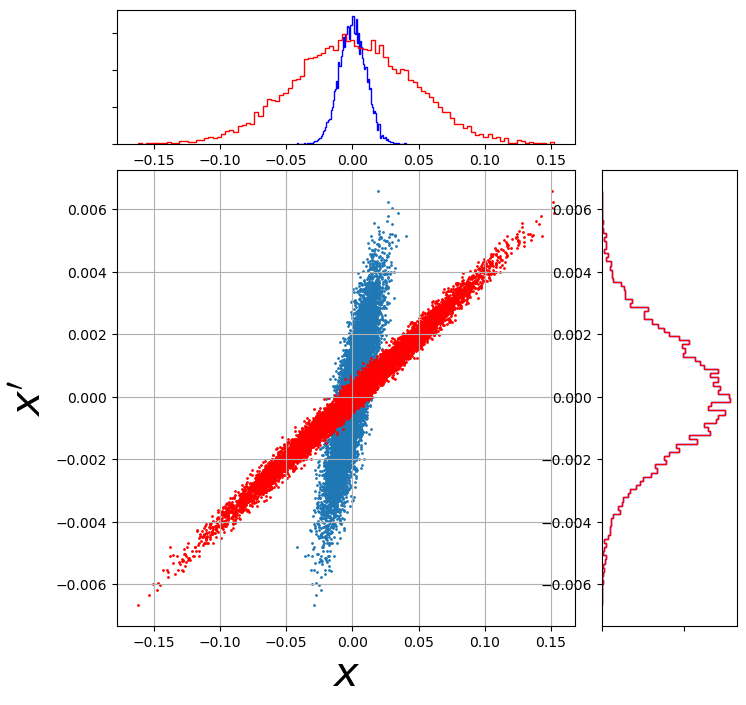

In [44]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, nxp, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### SBend Class

In [45]:
from elements import Sbend

In [46]:
b1 = Sbend("b1", "sbend", 1.5, 22.5)

In [47]:
b1.print_element_properties()

element name     : b1
element type     : sbend
element length   : 1.5
element strength : 22.5
element aperture : Not defined


In [48]:
b1.get_element_property("length")
b1.get_element_property("strength")
b1.get_element_property("angle")
b1.get_element_property("phi")

The element's length is 1.5
The element's strength is 22.5
The element's angle is 22.5
The element's phi is 0.39269908169872414


0.39269908169872414

In [49]:
matb1 = b1.get_transfer_matrix()
print (matb1)

[[ 0.92387953  1.46174304  0.          0.        ]
 [-0.10018629  0.92387953  0.          0.        ]
 [ 0.          0.          1.          1.5       ]
 [ 0.          0.          0.          1.        ]]


In [50]:
np.linalg.det(matb1[0:2,0:2])

0.9999999999999997

In [51]:
from beam import Bunch
from matplotlib import pyplot as plt

In [52]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

In [53]:
x = particles[0,:]
xp = particles[1,:]

In [54]:
b1.propagate(bunch)
new_particles = bunch.state

In [55]:
print (matb1.shape, particles.shape)

(4, 4) (4, 10000)


In [56]:
new_particles.shape

(4, 10000)

In [57]:
nx = new_particles[0,:]
nxp = new_particles[1,:]

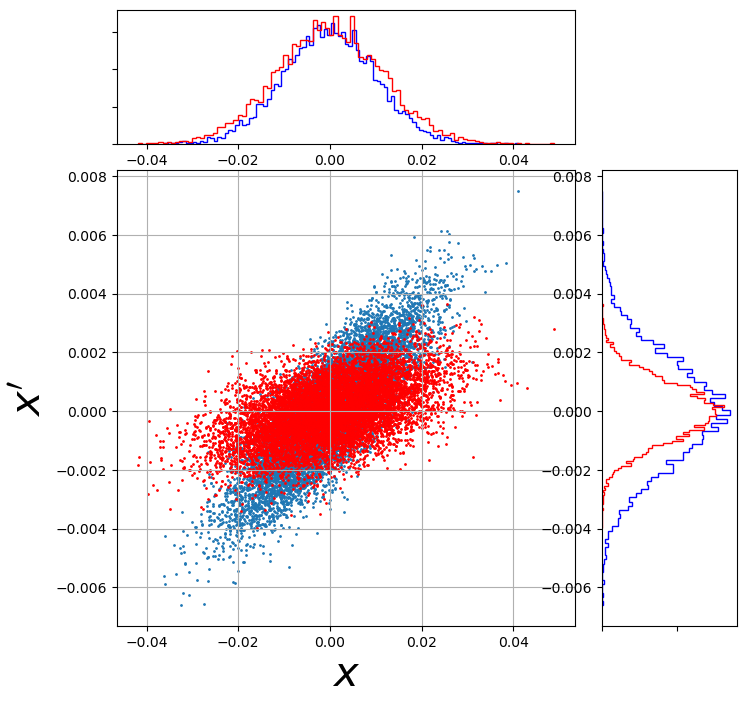

In [58]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, nxp, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

In [59]:
y = particles[2,:]
yp = particles[3,:]

In [60]:
ny = new_particles[2,:]
nyp = new_particles[3,:]

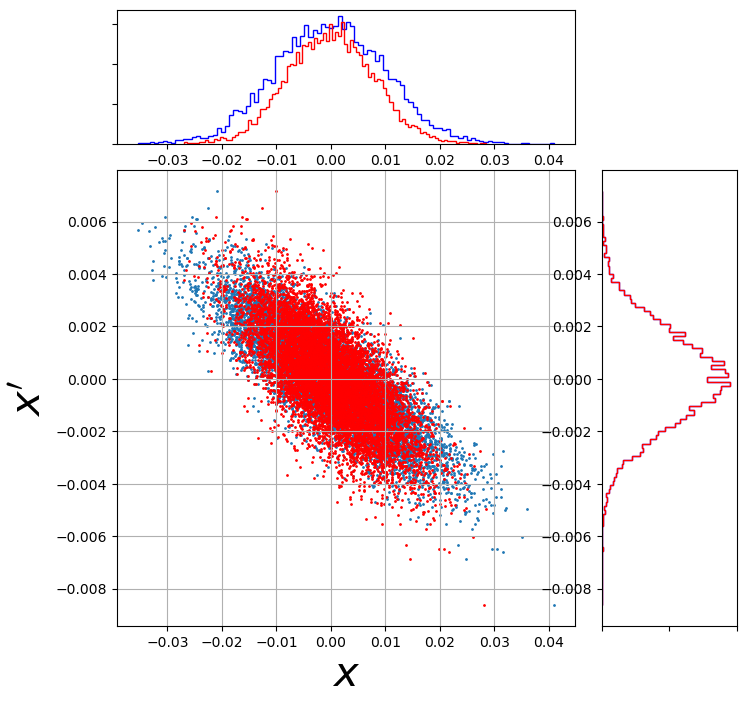

In [61]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(y, yp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(ny, nyp, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(y, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(yp, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(ny, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nyp, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

###  Quadrupole Class

In [62]:
from elements import Quadrupole

In [63]:
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2)
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2)

In [64]:
qf.print_element_properties()

element name     : qf
element type     : quadrupole
element length   : 0.4
element strength : 1.2
element aperture : Not defined


In [65]:
qd.print_element_properties()

element name     : qd
element type     : quadrupole
element length   : 0.4
element strength : -1.2
element aperture : Not defined


In [66]:
qf.get_element_property("length")
qf.get_element_property("strength")
qf.get_element_property("k1")

The element's length is 0.4
The element's strength is 1.2
The element's k1 is 1.2


1.2

In [67]:
qd.get_element_property("length")
qd.get_element_property("strength")
qd.get_element_property("k1")

The element's length is 0.4
The element's strength is -1.2
The element's k1 is -1.2


-1.2

In [68]:
matqf = qf.get_transfer_matrix()
print (matqf)

[[ 0.9055262   0.38732232  0.          0.        ]
 [-0.46478678  0.9055262   0.          0.        ]
 [ 0.          0.          1.09754586  0.41292344]
 [ 0.          0.          0.49550813  1.09754586]]


In [69]:
matqd = qd.get_transfer_matrix()
print (matqd)

[[ 1.09754586  0.41292344  0.          0.        ]
 [ 0.49550813  1.09754586  0.          0.        ]
 [ 0.          0.          0.9055262   0.38732232]
 [ 0.          0.         -0.46478678  0.9055262 ]]


In [70]:
print (np.linalg.det(matqf[0:2, 0:2]), np.linalg.det(matqf[2:4, 2:4]), np.linalg.det(matqd[0:2, 0:2]), np.linalg.det(matqd[2:4, 2:4]))

0.9999999999999997 1.0000000000000002 1.0000000000000002 0.9999999999999997


In [71]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

In [72]:
x = particles[0,:]
xp = particles[1,:]

In [73]:
qf.propagate(bunch)
new_particles = bunch.state

In [74]:
print (matqf.shape, particles.shape)

(4, 4) (4, 10000)


In [75]:
new_particles.shape

(4, 10000)

In [76]:
nx = new_particles[0,:]
nxp = new_particles[1,:]

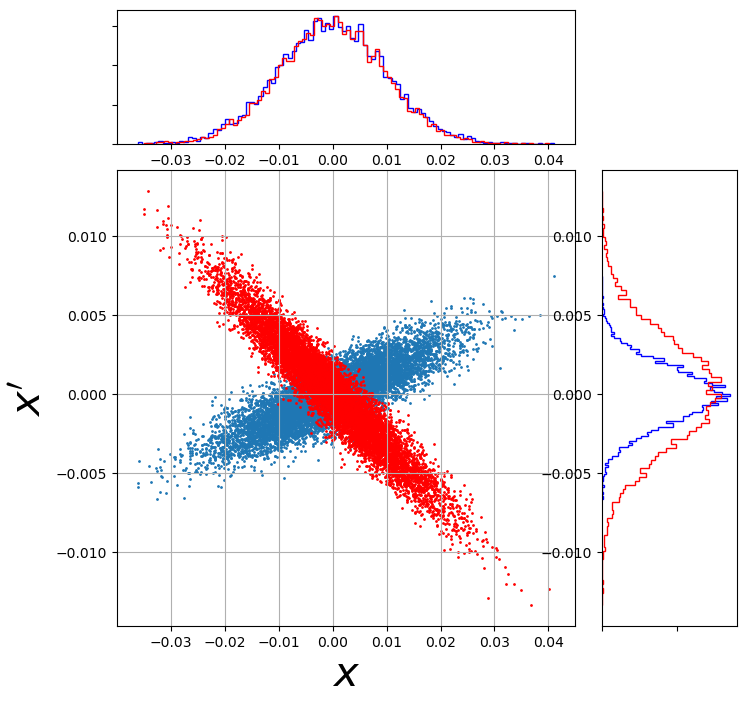

In [77]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, nxp, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

In [78]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

In [79]:
x = particles[0,:]
xp = particles[1,:]

In [80]:
qd.propagate(bunch)
new_particles = bunch.state

In [81]:
print (matqd.shape, particles.shape)

(4, 4) (4, 10000)


In [82]:
new_particles.shape

(4, 10000)

In [83]:
nx = new_particles[0,:]
nxp = new_particles[1,:]

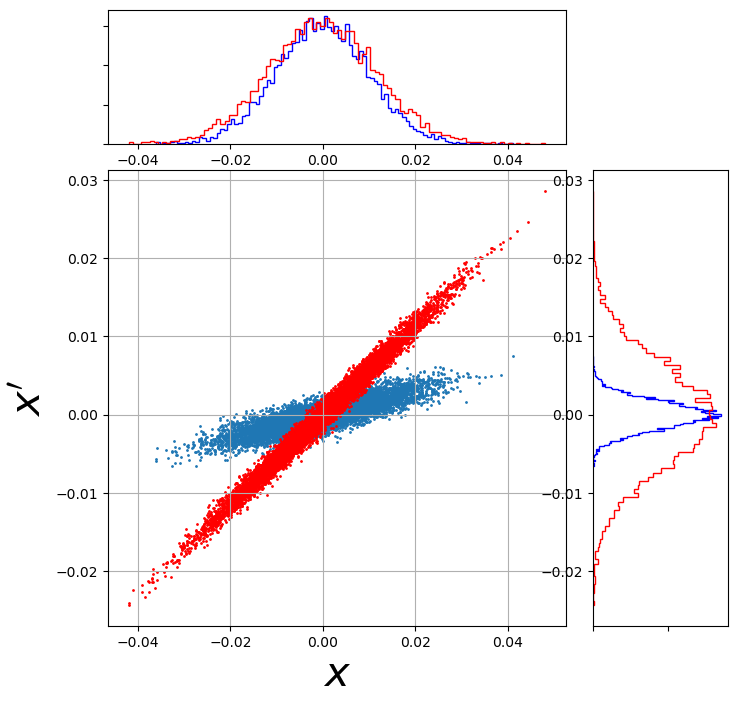

In [84]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, nxp, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Solenoid Class

In [85]:
from elements import Solenoid

In [86]:
s1 = Solenoid("s1", "solenoid", 2.0, 0.7)

In [87]:
s1.print_element_properties()

element name     : s1
element type     : solenoid
element length   : 2.0
element strength : 0.7
element aperture : Not defined


In [88]:
s1.get_element_property("length")
s1.get_element_property("strength")
s1.get_element_property("ks")

The element's length is 2.0
The element's strength is 0.7
The element's ks is 0.7


0.7

In [89]:
mats1 = s1.get_transfer_matrix()
print (mats1)

[[ 0.02888883  0.23927725  0.16749408  0.16031009]
 [-0.11724585  0.02888883 -0.07855194  0.16749408]
 [-0.16749408 -0.4785545   0.02888883  0.23927725]
 [ 0.07855194 -0.16749408 -0.11724585  0.02888883]]


In [90]:
print(np.linalg.det(mats1[0:2, 0:2]), np.linalg.det(mats1[2:4, 2:4]))

0.028888829665670947 0.028888829665670947


In [91]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

In [92]:
x = particles[0,:]
y = particles[2,:]

In [93]:
s1.propagate(bunch)
new_particles = bunch.state

In [94]:
print (mats1.shape, particles.shape)

(4, 4) (4, 10000)


In [95]:
new_particles.shape

(4, 10000)

In [96]:
nx = new_particles[0,:]
ny = new_particles[2,:]

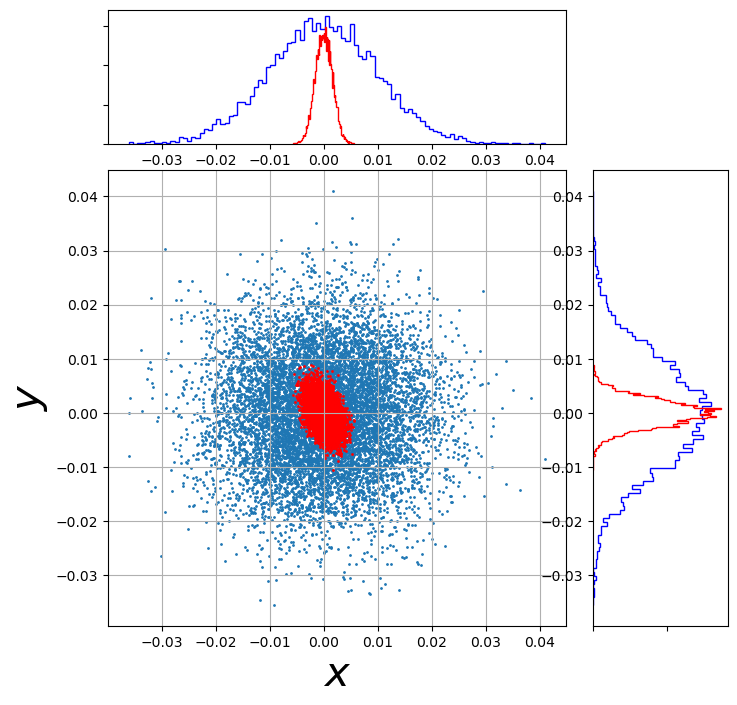

In [97]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### RF Cavity Class

In [98]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

In [99]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.896801347894918e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.98159585851434e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [100]:
rfcavity = Rfcavity("rfcav", "rfcavity", length=1.0, strength=10, phase=0) #, freq=3e9)

In [101]:
rfcavity.get_element_property("phase") * 180 / np.pi

The element's phase is 0.0


0.0

In [102]:
rfcavity.get_transfer_matrix(bunch)

array([[ 0.87846566,  0.24815337,  0.        ,  0.        ],
       [-0.0431639 ,  0.57116113,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.87846566,  0.24815337],
       [ 0.        ,  0.        , -0.0431639 ,  0.57116113]])

In [103]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.896801347894918e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.98159585851434e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 20.0 MeV
particle momentum         : 19.99347093611059 MeV/c
particle gamma            : 40.13902367118367
particle beta             : 0.9996896128022548
particle s                : 0


In [104]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

In [105]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.896801347894918e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.98159585851434e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [106]:
rfcavity.propagate(bunch)

In [107]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 8.391015341392135 m
alpha_x                   : -0.40343530988580434 m^(1/2)
emittance_x               : 5.0716822144872686e-06 mm-mrad
beta_y                    : 7.083050057219886 m
alpha_y                   : 1.0696672089766317 m^(1/2)
emittance_y               : 5.115135730050267e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 20.0 MeV
particle momentum         : 19.99347093611059 MeV/c
particle gamma            : 40.13902367118367
particle beta             : 0.9996896128022548
particle s                : 1.0


In [108]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

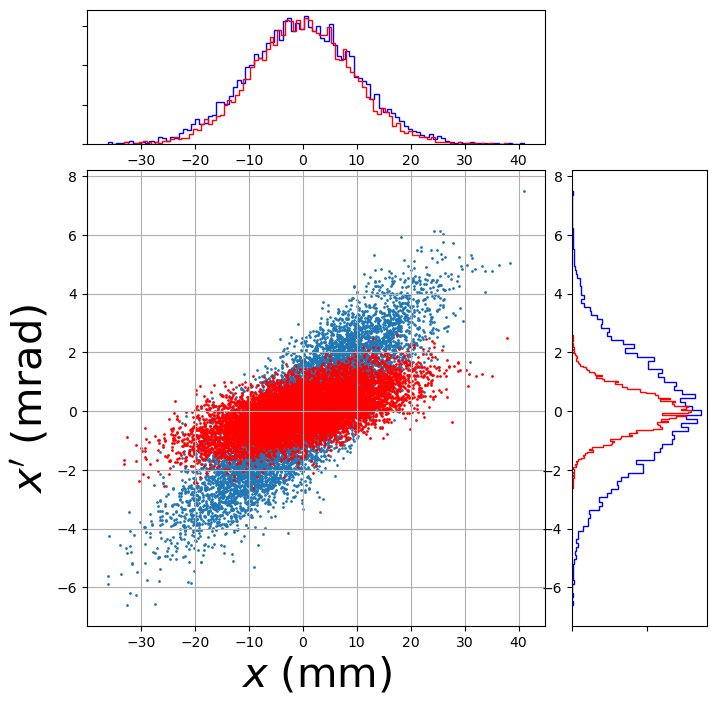

In [109]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

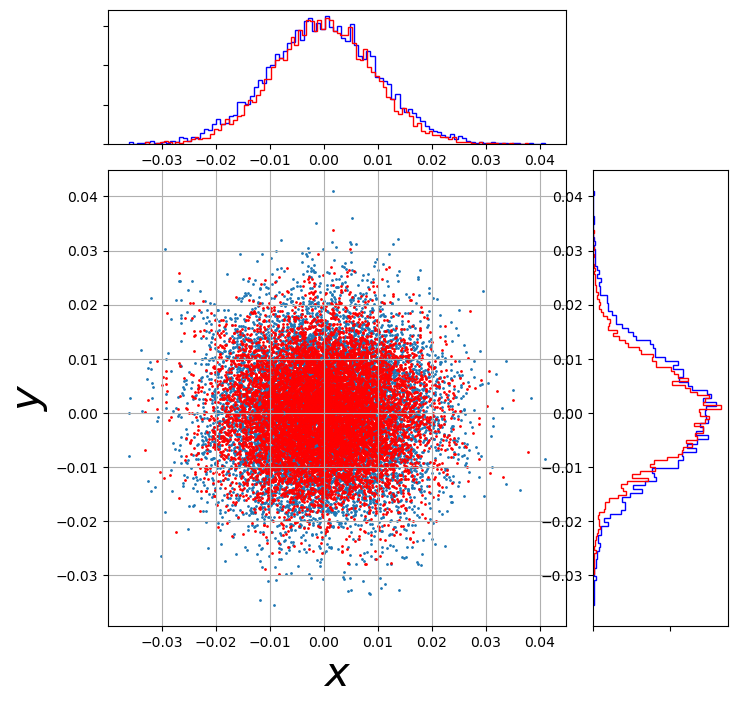

In [110]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Marker class

In [111]:
from elements import Marker

In [112]:
m1 = Marker("m1", "marker")

In [113]:
m1.print_element_properties()

element name     : m1
element type     : marker
element length   : 0
element strength : 0
element aperture : Not defined


In [114]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

In [115]:
x = particles[0,:]
y = particles[2,:]

In [116]:
m1.propagate(bunch)
new_particles = bunch.state

In [117]:
new_particles.shape

(4, 10000)

In [118]:
nx = new_particles[0,:]
ny = new_particles[2,:]

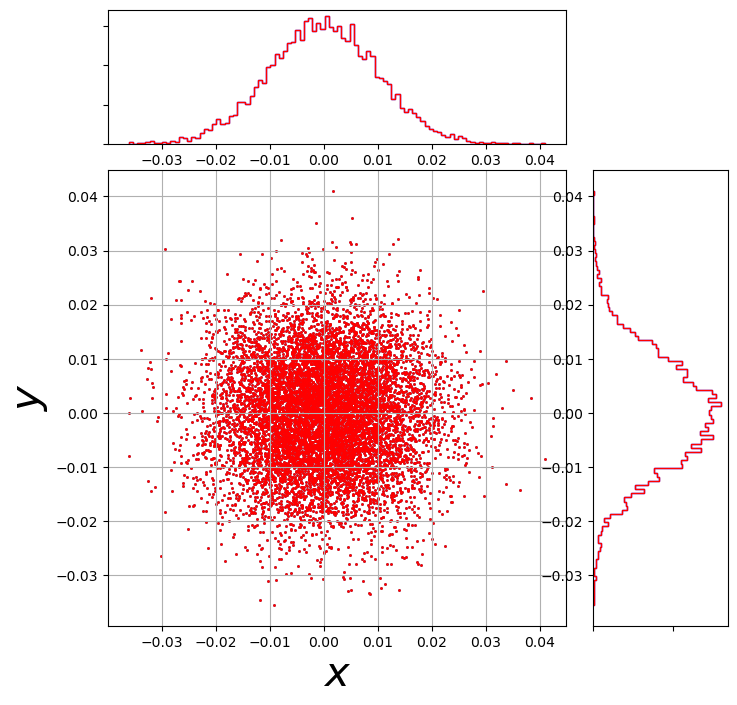

In [119]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Aperture

### Rectangular Aperture

In [120]:
from elements.aperture import Rectangular_aperture as ra

In [121]:
ra1 = ra(["rectangular", 0.01, 0.02])

In [122]:
new_particles, lost = ra1.apply_rectangular_aperture(particles)

In [123]:
print (particles.shape, new_particles.shape, lost)

(4, 10000) (4, 2621) 7379


In [124]:
nx2 = new_particles[0,:]
ny2 = new_particles[2,:]

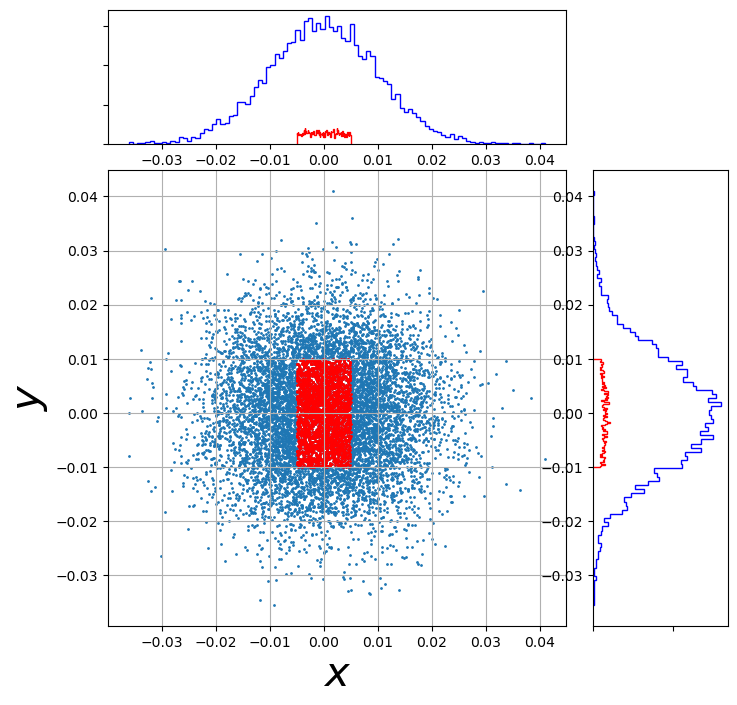

In [125]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx2, ny2, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx2, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny2, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Circular Aperture

In [126]:
from elements.aperture import Circular_aperture as ca

In [127]:
ca1 = ca(["circular", 0.01])

In [128]:
new_particles, lost = ca1.apply_circular_aperture(particles)

In [129]:
print (particles.shape, new_particles.shape, lost)

(4, 10000) (4, 3963) 6037


In [130]:
nx2 = new_particles[0,:]
ny2 = new_particles[2,:]

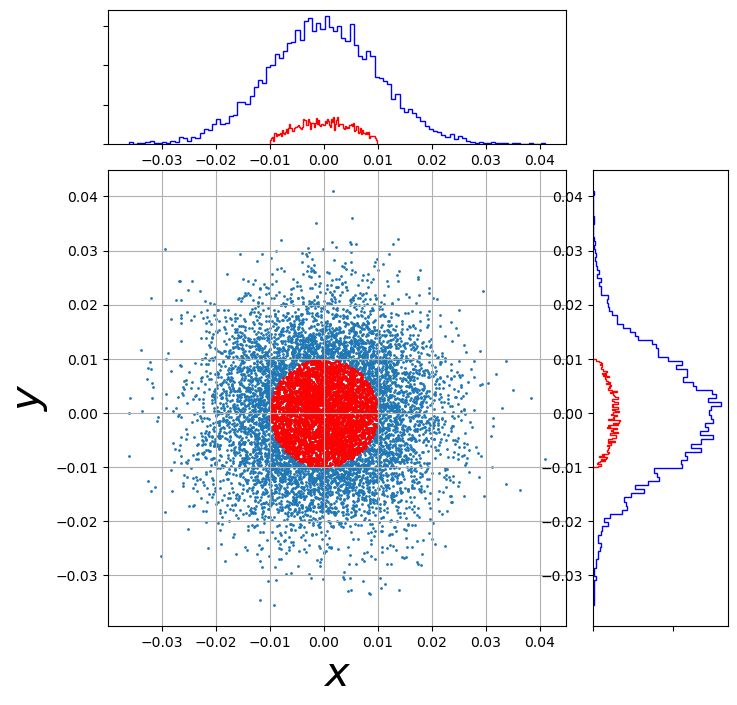

In [131]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx2, ny2, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx2, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny2, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Elliptical Aperture

In [132]:
from elements.aperture import Elliptical_aperture as ea

In [133]:
ea1 = ea(["elliptical", 0.01, 0.005])

In [134]:
new_particles, lost = ea1.apply_elliptical_aperture(particles)

In [135]:
print (particles.shape, new_particles.shape, lost)

(4, 10000) (4, 2160) 7840


In [136]:
nx2 = new_particles[0,:]
ny2 = new_particles[2,:]

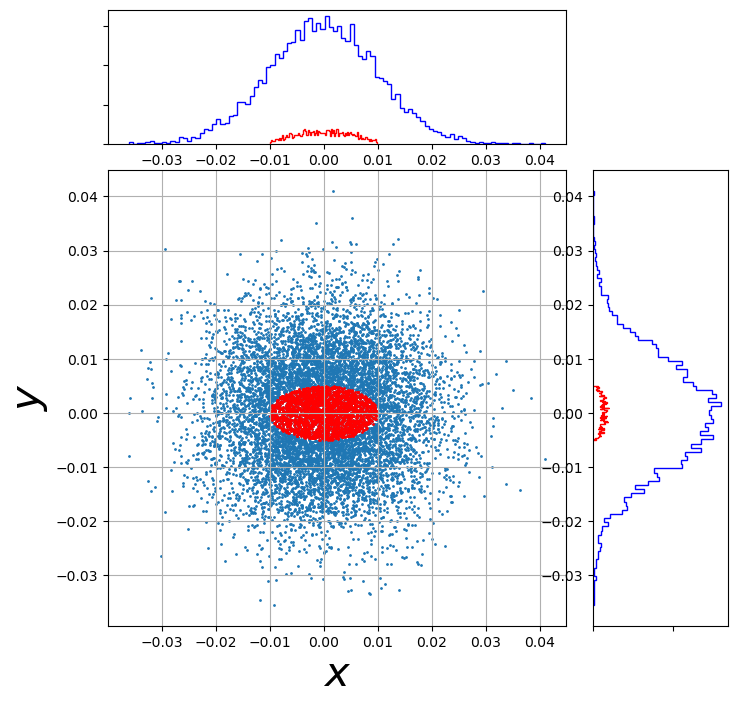

In [137]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx2, ny2, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx2, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny2, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Apertures @ Elements

### Test Marker Element

In [138]:
from matplotlib import pyplot as plt

In [139]:
from elements import Marker

In [140]:
m2 = Marker("m2", "marker")

In [141]:
m2.print_element_properties()

element name     : m2
element type     : marker
element length   : 0
element strength : 0
element aperture : Not defined


In [142]:
m2.get_aperture_properties()

0

In [143]:
m2.set_aperture_properties(["rectangular", 1e-2, 2e-2])

In [144]:
m2.get_aperture_properties()

['rectangular', 0.01, 0.02]

In [145]:
m2.print_element_properties()

element name     : m2
element type     : marker
element length   : 0
element strength : 0
element aperture : ['rectangular', 0.01, 0.02]


In [146]:
m3 = Marker("m3", "marker", aperture=["circular", 1e-2])

In [147]:
m3.print_element_properties()

element name     : m3
element type     : marker
element length   : 0
element strength : 0
element aperture : ['circular', 0.01]


In [148]:
m3.get_element_property("aperture")

The element's aperture is ['circular', 0.01]


['circular', 0.01]

In [149]:
m3.get_aperture_properties()

['circular', 0.01]

In [150]:
from beam import Bunch

In [151]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [152]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [153]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.896801347894918e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.98159585851434e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [154]:
particles = bunch.state
x = particles[0,:]
y = particles[2,:]

In [155]:
m3.propagate(bunch)

In [156]:
bunch.print_bunch_properties()

number of macro particles : 3963
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 4.784979596126536e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 4.795835975020984e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [157]:
new_particles = bunch.state
nx = new_particles[0,:]
ny = new_particles[2,:]

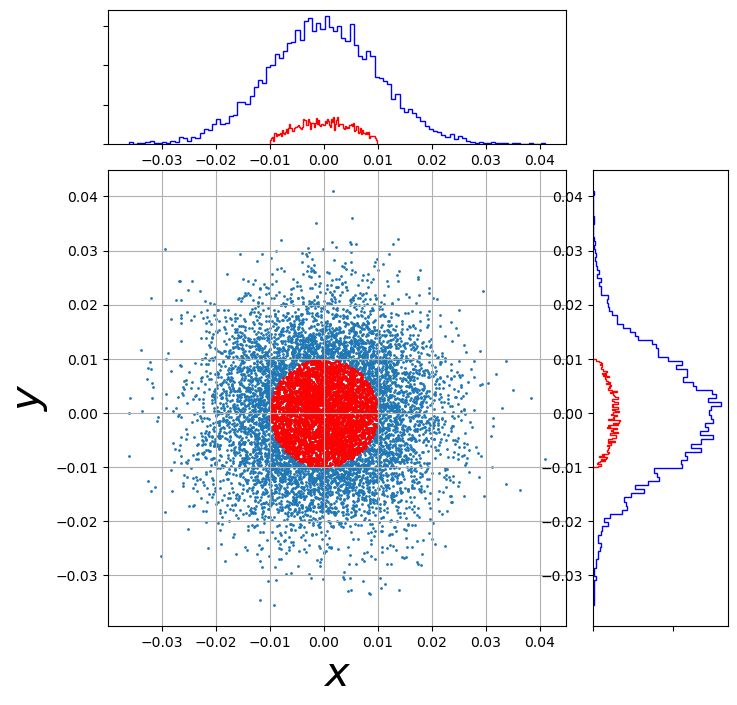

In [158]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Drift Element

In [159]:
from elements import Drift

In [160]:
d1 = Drift("d1", "drift", 10)

In [161]:
d1.print_element_properties()

element name     : d1
element type     : drift
element length   : 10
element strength : 0
element aperture : Not defined


In [162]:
d1.set_aperture_properties(["rectangular", 1e-2, 3e-2])

In [163]:
d1.print_element_properties()

element name     : d1
element type     : drift
element length   : 10
element strength : 0
element aperture : ['rectangular', 0.01, 0.03]


In [164]:
d1.get_element_property("aperture")

The element's aperture is ['rectangular', 0.01, 0.03]


['rectangular', 0.01, 0.03]

In [165]:
d1.get_aperture_properties()

['rectangular', 0.01, 0.03]

In [166]:
from beam import Bunch

In [167]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [168]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [169]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.896801347894918e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.98159585851434e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [170]:
particles = bunch.state
x = particles[0,:]
y = particles[2,:]

In [171]:
d1.propagate(bunch)

In [172]:
bunch.print_bunch_properties()

number of macro particles : 1260
beta_x                    : 72.5 m
alpha_x                   : -4.75 m^(1/2)
emittance_x               : 1.0956816848840424e-06 mm-mrad
beta_y                    : 12.5 m
alpha_y                   : -1.75 m^(1/2)
emittance_y               : 6.632246609013734e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 10


In [173]:
new_particles = bunch.state
nx = new_particles[0,:]
ny = new_particles[2,:]

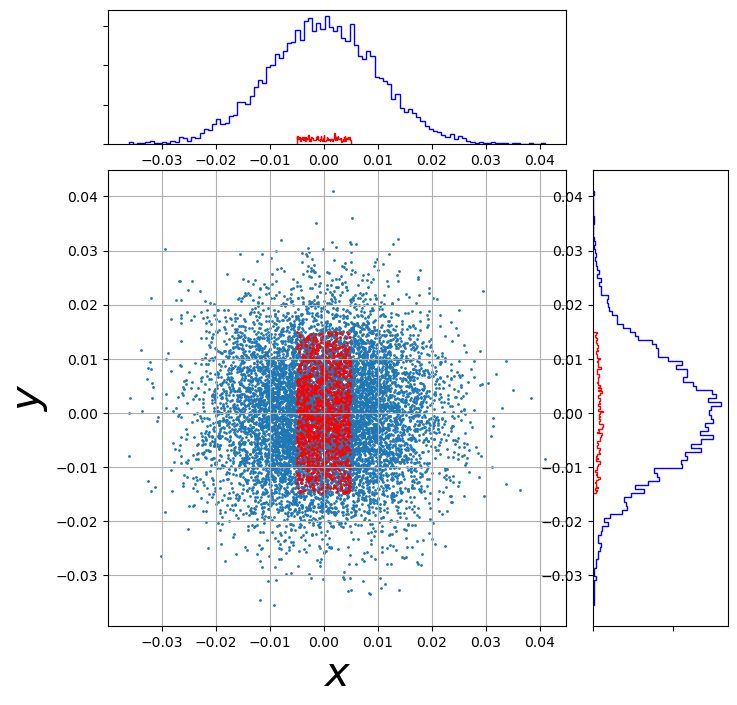

In [174]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Sbend Element

In [175]:
from elements import Sbend

In [176]:
b1 = Sbend("b1", "sbend", 1.5, 22.5, aperture=["circular", 1e-2])

In [177]:
b1.print_element_properties()

element name     : b1
element type     : sbend
element length   : 1.5
element strength : 22.5
element aperture : ['circular', 0.01]


In [178]:
b1.print_element_properties()

element name     : b1
element type     : sbend
element length   : 1.5
element strength : 22.5
element aperture : ['circular', 0.01]


In [179]:
b1.get_element_property("aperture")

The element's aperture is ['circular', 0.01]


['circular', 0.01]

In [180]:
b1.get_aperture_properties()

['circular', 0.01]

In [181]:
from beam import Bunch

In [182]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [183]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [184]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.896801347894918e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.98159585851434e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [185]:
particles = bunch.state
x = particles[0,:]
y = particles[2,:]

In [186]:
b1.propagate(bunch)

In [187]:
bunch.print_bunch_properties()

number of macro particles : 4177
beta_x                    : 13.281382458736953 m
alpha_x                   : -0.573963763790084 m^(1/2)
emittance_x               : 4.163556229175757e-06 mm-mrad
beta_y                    : 6.23125 m
alpha_y                   : 1.0125 m^(1/2)
emittance_y               : 5.815438252235159e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 1.5


In [188]:
new_particles = bunch.state
nx = new_particles[0,:]
ny = new_particles[2,:]

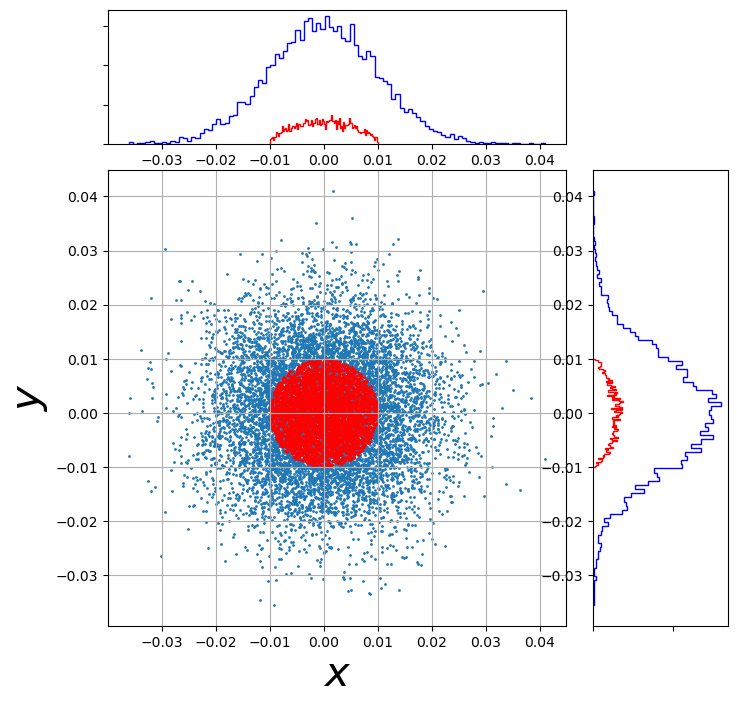

In [189]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Quad Element

In [190]:
from elements import Quadrupole

In [191]:
qf1 = Quadrupole("qf", "quadrupole", 0.4, 1.2)

In [192]:
qf1.print_element_properties()

element name     : qf
element type     : quadrupole
element length   : 0.4
element strength : 1.2
element aperture : Not defined


In [193]:
qf1.set_aperture_properties(["rectangular", 1e-2, 3e-2])

In [194]:
qf1.print_element_properties()

element name     : qf
element type     : quadrupole
element length   : 0.4
element strength : 1.2
element aperture : ['rectangular', 0.01, 0.03]


In [195]:
qf1.get_element_property("aperture")

The element's aperture is ['rectangular', 0.01, 0.03]


['rectangular', 0.01, 0.03]

In [196]:
qf1.get_aperture_properties()

['rectangular', 0.01, 0.03]

In [197]:
from beam import Bunch

In [198]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [199]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [200]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.896801347894918e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.98159585851434e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [201]:
particles = bunch.state
x = particles[0,:]
y = particles[2,:]

In [202]:
qf1.propagate(bunch)

In [203]:
bunch.print_bunch_properties()

number of macro particles : 3429
beta_x                    : 9.300724614618339 m
alpha_x                   : 3.1348455858000484 m^(1/2)
emittance_x               : 2.9305686537220914e-06 mm-mrad
beta_y                    : 10.741876362904641 m
alpha_y                   : -3.4718990218904144 m^(1/2)
emittance_y               : 7.16034362949523e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0.4


In [204]:
new_particles = bunch.state
nx = new_particles[0,:]
ny = new_particles[2,:]

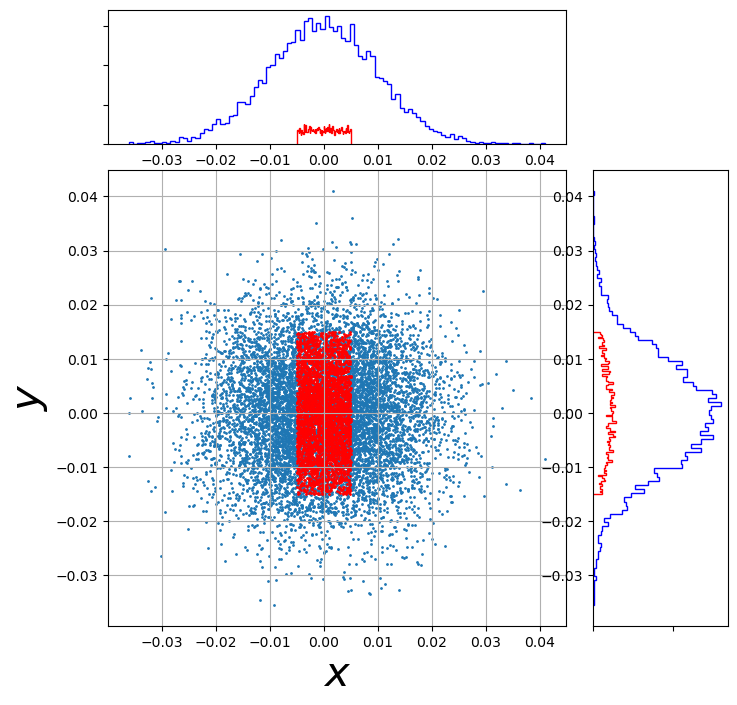

In [205]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Solenoid Element

In [206]:
from elements import Solenoid

In [207]:
s1 = Solenoid("s1", "solenoid", 2.0, 0.7)

In [208]:
s1.print_element_properties()

element name     : s1
element type     : solenoid
element length   : 2.0
element strength : 0.7
element aperture : Not defined


In [209]:
s1.set_aperture_properties(["elliptical", 0.01, 0.005])

In [210]:
s1.print_element_properties()

element name     : s1
element type     : solenoid
element length   : 2.0
element strength : 0.7
element aperture : ['elliptical', 0.01, 0.005]


In [211]:
s1.get_element_property("aperture")

The element's aperture is ['elliptical', 0.01, 0.005]


['elliptical', 0.01, 0.005]

In [212]:
s1.get_aperture_properties()

['elliptical', 0.01, 0.005]

In [213]:
from beam import Bunch

In [214]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [215]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [216]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.896801347894918e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.98159585851434e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [217]:
particles = bunch.state
x = particles[0,:]
y = particles[2,:]

In [218]:
s1.propagate(bunch)

In [219]:
bunch.print_bunch_properties()

number of macro particles : 9532
beta_x                    : 0.04769038474531104 m
alpha_x                   : 0.07245396278526789 m^(1/2)
emittance_x               : 1.0411987052288723e-06 mm-mrad
beta_y                    : 0.0062157464172875355 m
alpha_y                   : -0.00920513933503207 m^(1/2)
emittance_y               : 2.7006657579735606e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 2.0


In [220]:
new_particles = bunch.state
nx = new_particles[0,:]
ny = new_particles[2,:]

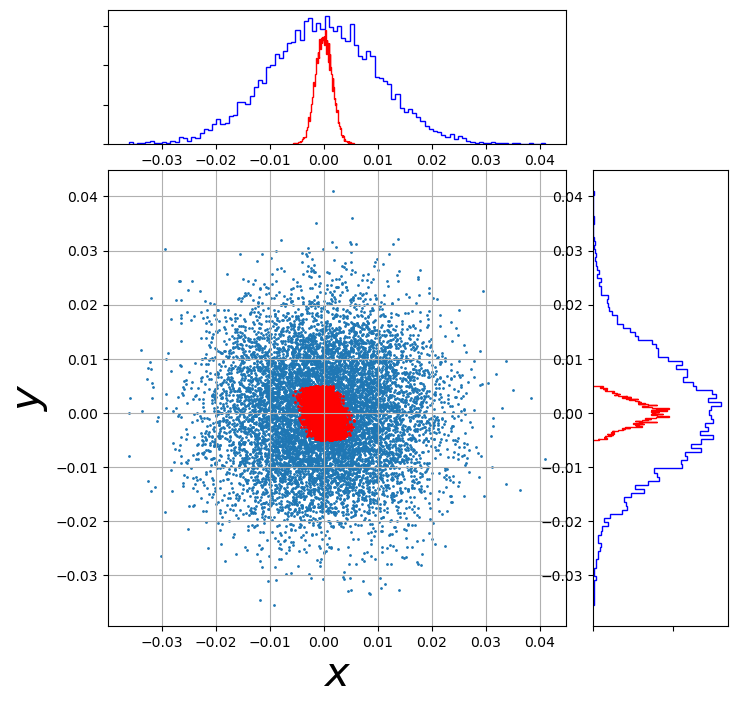

In [221]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Reference Particle

In [222]:
import numpy as np
from matplotlib import pyplot as plt

In [223]:
from beam import Bunch

In [224]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [225]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [226]:
bunch.particle.print_particle_properties()

particle species  : electron
particle charge   : -1
particle mass     : 0.51099895 MeV/c^2
particle energy   : 10 MeV
particle momentum : 9.98693546955716 MeV/c
particle gamma    : 20.569511835591836
particle beta     : 0.9988175606506312


In [227]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.896801347894918e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.98159585851434e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [228]:
particles = bunch.state

In [229]:
bunch.particle.update_s(10)
print (bunch.particle.get_s())

10


In [230]:
bunch.state

array([[ 0.00666713,  0.00601393, -0.00520437, ...,  0.00327537,
         0.01272418,  0.00249554],
       [ 0.00015732,  0.00132687,  0.00095295, ...,  0.00042006,
         0.00299127,  0.00083199],
       [ 0.00315186, -0.00281643, -0.00490939, ...,  0.00633096,
         0.00556117,  0.00709533],
       [-0.0006512 ,  0.00060024,  0.00038988, ..., -0.00072139,
        -0.00109288, -0.0009653 ]])

In [231]:
particles

array([[ 0.00666713,  0.00601393, -0.00520437, ...,  0.00327537,
         0.01272418,  0.00249554],
       [ 0.00015732,  0.00132687,  0.00095295, ...,  0.00042006,
         0.00299127,  0.00083199],
       [ 0.00315186, -0.00281643, -0.00490939, ...,  0.00633096,
         0.00556117,  0.00709533],
       [-0.0006512 ,  0.00060024,  0.00038988, ..., -0.00072139,
        -0.00109288, -0.0009653 ]])

In [232]:
refparticle = bunch.particle

In [233]:
refparticle.get_s()

10

In [234]:
refparticle.update_s(2)

In [235]:
refparticle.get_s()

12

In [236]:
bunch.particle.get_s()

12

In [237]:
bunch.particle.reset_s()

### Test Drift Element

In [238]:
from elements import Drift

In [239]:
d1 = Drift("d1", "drift", 5)

In [240]:
d1.print_element_properties()

element name     : d1
element type     : drift
element length   : 5
element strength : 0
element aperture : Not defined


In [241]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.896801347894918e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.98159585851434e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [242]:
particles = bunch.state
x = particles[0,:]
xp = particles[1,:]

In [243]:
d1.propagate(bunch)

In [244]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 33.125 m
alpha_x                   : -3.125 m^(1/2)
emittance_x               : 9.896801347894943e-06 mm-mrad
beta_y                    : 3.125 m
alpha_y                   : -0.125 m^(1/2)
emittance_y               : 9.98159585851434e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 5


In [245]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]

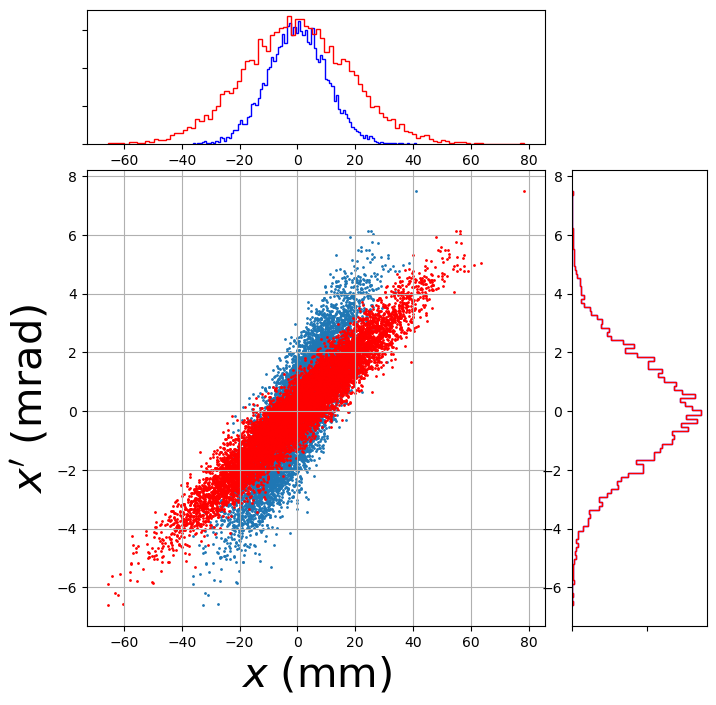

In [246]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Sbend Element

In [247]:
from elements import Sbend

In [248]:
b1 = Sbend("b1", "sbend", 1.5, 22.5)

In [249]:
b1.print_element_properties()

element name     : b1
element type     : sbend
element length   : 1.5
element strength : 22.5
element aperture : Not defined


In [250]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 33.125 m
alpha_x                   : -3.125 m^(1/2)
emittance_x               : 9.896801347894943e-06 mm-mrad
beta_y                    : 3.125 m
alpha_y                   : -0.125 m^(1/2)
emittance_y               : 9.98159585851434e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 5


In [251]:
particles = bunch.state
x = particles[0,:]
xp = particles[1,:]

In [252]:
b1.propagate(bunch)

In [253]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 37.408846657472296 m
alpha_x                   : 0.4174391323007811 m^(1/2)
emittance_x               : 9.896801347894918e-06 mm-mrad
beta_y                    : 4.23125 m
alpha_y                   : -0.6125 m^(1/2)
emittance_y               : 9.98159585851434e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 6.5


In [254]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]

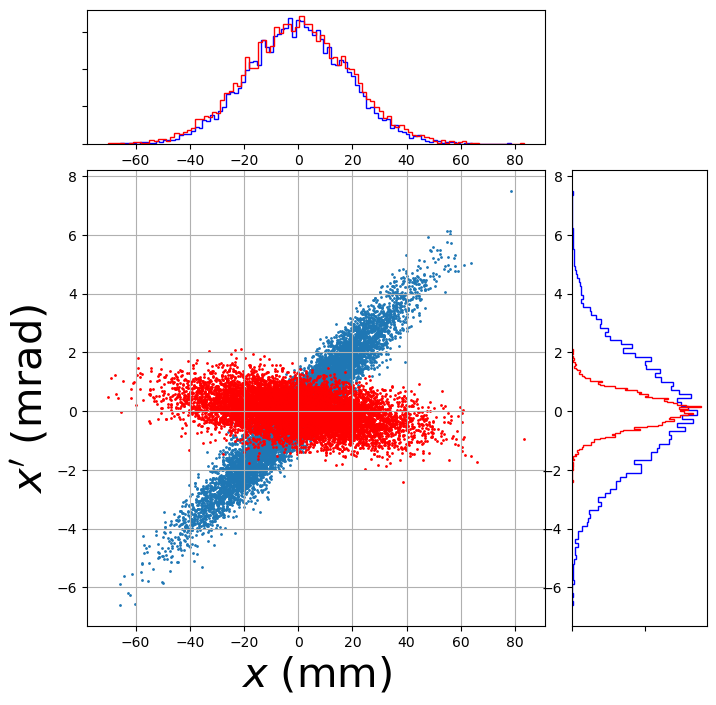

In [255]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Quadrupole Element

In [256]:
from elements import Quadrupole

In [257]:
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2)
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2)

In [258]:
qf.print_element_properties()

element name     : qf
element type     : quadrupole
element length   : 0.4
element strength : 1.2
element aperture : Not defined


In [259]:
qd.print_element_properties()

element name     : qd
element type     : quadrupole
element length   : 0.4
element strength : -1.2
element aperture : Not defined


In [260]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 37.408846657472296 m
alpha_x                   : 0.4174391323007811 m^(1/2)
emittance_x               : 9.896801347894918e-06 mm-mrad
beta_y                    : 4.23125 m
alpha_y                   : -0.6125 m^(1/2)
emittance_y               : 9.98159585851434e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 6.5


In [261]:
particles = bunch.state
x = particles[0,:]
xp = particles[1,:]

In [262]:
d1.propagate(bunch)
qf.propagate(bunch)
d1.propagate(bunch)
qd.propagate(bunch)
d1.propagate(bunch)

In [263]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 2186.6455875894667 m
alpha_x                   : -339.1004662141573 m^(1/2)
emittance_x               : 9.896801347702049e-06 mm-mrad
beta_y                    : 166.3367886101422 m
alpha_y                   : -79.15799855963047 m^(1/2)
emittance_y               : 9.981595858522775e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 22.299999999999997


In [264]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]

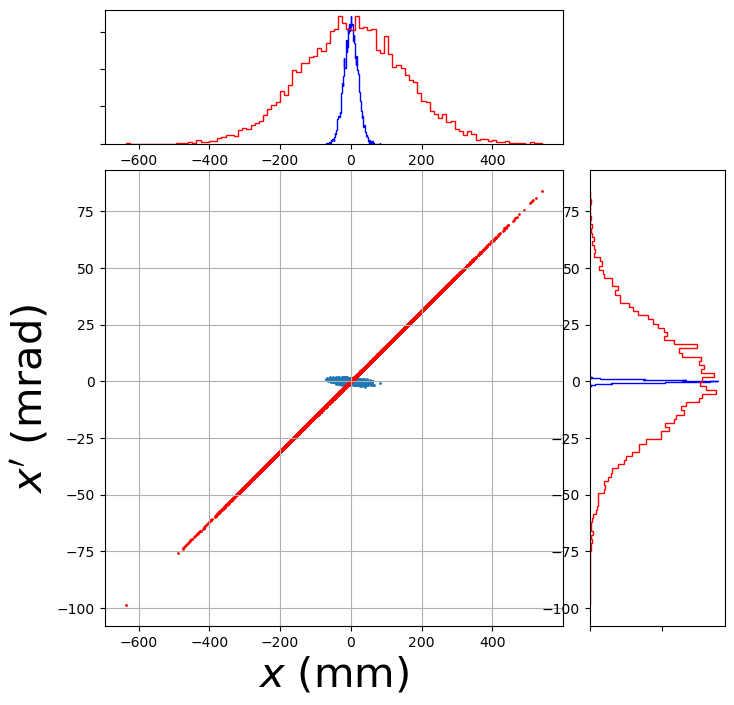

In [265]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Marker

In [266]:
from elements import Marker

In [267]:
m1 = Marker("m1", "marker")

In [268]:
m1.print_element_properties()

element name     : m1
element type     : marker
element length   : 0
element strength : 0
element aperture : Not defined


In [269]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 2186.6455875894667 m
alpha_x                   : -339.1004662141573 m^(1/2)
emittance_x               : 9.896801347702049e-06 mm-mrad
beta_y                    : 166.3367886101422 m
alpha_y                   : -79.15799855963047 m^(1/2)
emittance_y               : 9.981595858522775e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 22.299999999999997


In [270]:
particles = bunch.state
x = particles[0,:]
xp = particles[1,:]

In [271]:
m1.propagate(bunch)

In [272]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 2186.6455875894667 m
alpha_x                   : -339.1004662141573 m^(1/2)
emittance_x               : 9.896801347702049e-06 mm-mrad
beta_y                    : 166.3367886101422 m
alpha_y                   : -79.15799855963047 m^(1/2)
emittance_y               : 9.981595858522775e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 22.299999999999997


In [273]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]

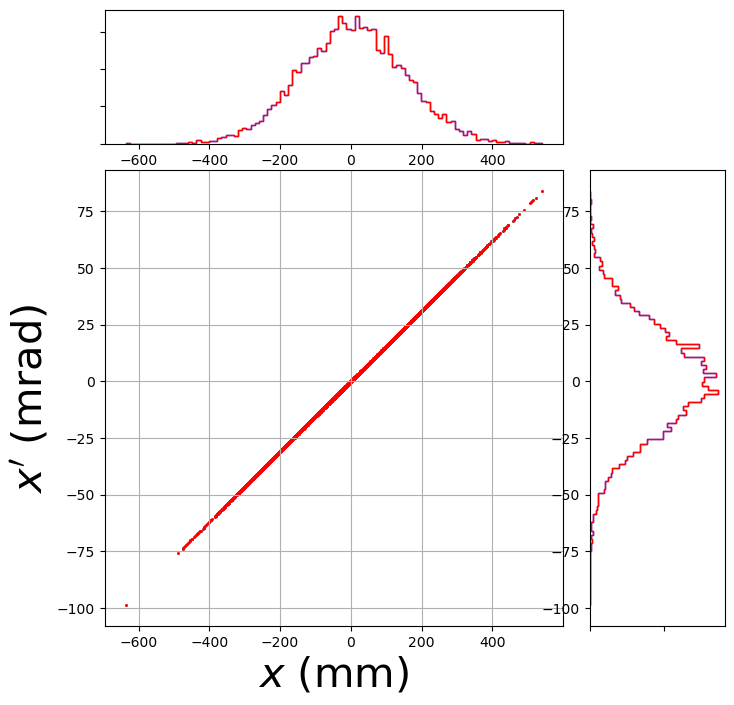

In [274]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Beamline

In [275]:
from elements import *
from beamline import Beamline
from beam import Bunch
from matplotlib import pyplot as plt

### Construct Beamline List

In [276]:
d1 = Drift("d1", "drift", 5, aperture=['circular', 1e-1])
b1 = Sbend("b1", "sbend", 1.5, 22.5, aperture=['circular', 1e-1])
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2, aperture=['circular', 1e-1])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2, aperture=['circular', 1e-1])
m1 = Marker("m1", "marker", aperture=['circular', 1e-1])

In [277]:
fodo_list = [qf, d1, b1, d1, qd, d1, b1, d1, m1]

In [278]:
fodo_list[0].element_properties["type"]

'quadrupole'

In [279]:
fodo = Beamline("fodo", fodo_list)

In [280]:
fodo.get_num_beamline_elements()

9

In [281]:
fodo.print_beamline()

   qf quadrupole  0.400  1.200  0.400
   d1      drift  5.000  0.000  5.400
   b1      sbend  1.500 22.500  6.900
   d1      drift  5.000  0.000 11.900
   qd quadrupole  0.400 -1.200 12.300
   d1      drift  5.000  0.000 17.300
   b1      sbend  1.500 22.500 18.800
   d1      drift  5.000  0.000 23.800
   m1     marker  0.000  0.000 23.800


In [282]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [283]:
particles = bunch.generate_transverse_matched_beam_distribution(seed=24289)
x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

In [284]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.927187738405508e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.966452576433268e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [285]:
fodo.propagate_beamline(bunch)

         0         qf quadrupole    0.40000    0.40000      10000/     10000    9.92719    9.96645
         1         d1      drift    5.00000    5.40000      10000/     10000    9.92719    9.96645
         2         b1      sbend    1.50000    6.90000       9977/     10000    9.93004    9.85972
         3         d1      drift    5.00000   11.90000       9456/     10000    9.80662    8.65205
         4         qd quadrupole    0.40000   12.30000       9449/     10000    9.78093    8.64632
         5         d1      drift    5.00000   17.30000       5744/     10000    4.94465    7.64323
         6         b1      sbend    1.50000   18.80000       4014/     10000    4.32701    5.47890
         7         d1      drift    5.00000   23.80000       1842/     10000    3.68106    2.65961
         8         m1     marker    0.00000   23.80000       1842/     10000    3.68106    2.65961


In [286]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

In [287]:
bunch.print_bunch_properties()

number of macro particles : 1842
beta_x                    : 1707.3766328751396 m
alpha_x                   : -44.38819338931149 m^(1/2)
emittance_x               : 3.68106073996283e-06 mm-mrad
beta_y                    : 3421.758212204653 m
alpha_y                   : -372.7247939690699 m^(1/2)
emittance_y               : 2.6596056592123336e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 23.8


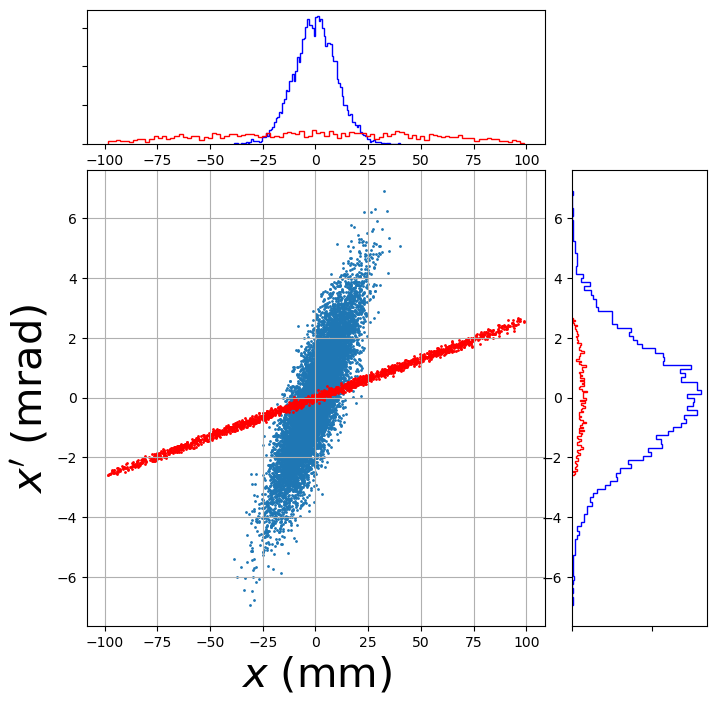

In [288]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

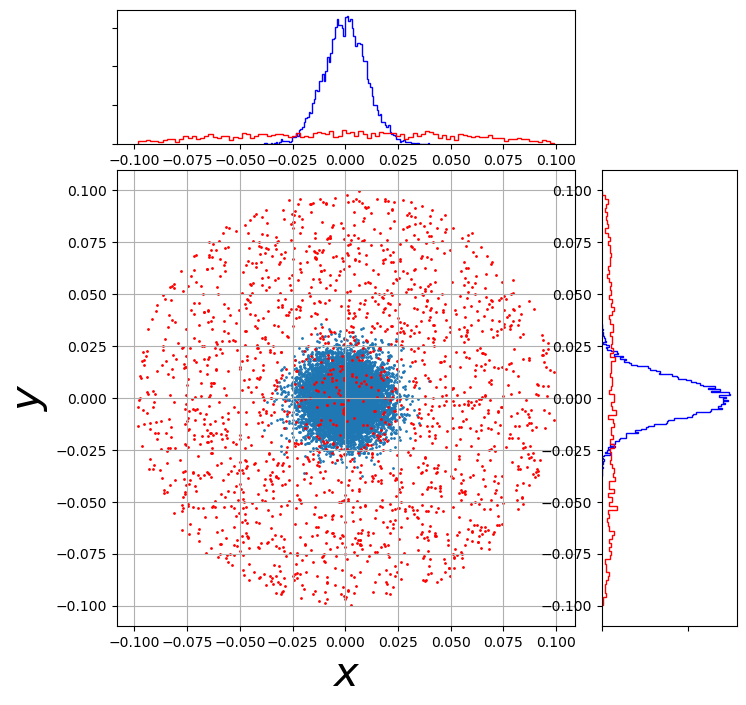

In [289]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Element and Beamline Slicing

### Element Slicing

In [290]:
from elements import *
from beamline import Beamline
from beam import Bunch
from matplotlib import pyplot as plt

In [291]:
d1 = Drift("d1", "drift", 5, aperture=['circular', 1e-1])

In [292]:
new_elements = d1.slice_element(4)

In [293]:
for element in new_elements:
    element.print_element_properties()

element name     : d1_sliced_0
element type     : drift
element length   : 1.25
element strength : 0
element aperture : ['circular', 0.1]
element name     : d1_sliced_1
element type     : drift
element length   : 1.25
element strength : 0
element aperture : ['circular', 0.1]
element name     : d1_sliced_2
element type     : drift
element length   : 1.25
element strength : 0
element aperture : ['circular', 0.1]
element name     : d1_sliced_3
element type     : drift
element length   : 1.25
element strength : 0
element aperture : ['circular', 0.1]


### Slice an RF Cavity

In [294]:
rfcavity = Rfcavity("rfcav", "rfcavity", length=1.0, strength=10, phase=0) #, freq=3e9)

In [295]:
sliced_rf_cavity = rfcavity.slice_element(4)

In [296]:
for i in sliced_rf_cavity:
    print (i.print_element_properties())

element name     : rfcav_sliced_0
element type     : rfcavity
element length   : 0.25
element strength : 10
element aperture : Not defined
None
element name     : rfcav_sliced_1
element type     : rfcavity
element length   : 0.25
element strength : 10
element aperture : Not defined
None
element name     : rfcav_sliced_2
element type     : rfcavity
element length   : 0.25
element strength : 10
element aperture : Not defined
None
element name     : rfcav_sliced_3
element type     : rfcavity
element length   : 0.25
element strength : 10
element aperture : Not defined
None


### Beamline Slicing

In [297]:
d1 = Drift("d1", "drift", 5)#, aperture=['circular', 1e-1])
b1 = Sbend("b1", "sbend", 1.5, 22.5)#, aperture=['circular', 1e-1])
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2)#, aperture=['circular', 1e-1])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2)#, aperture=['circular', 1e-1])
m1 = Marker("m1", "marker")#, aperture=['circular', 1e-1])

In [298]:
fodo_list = [qf, d1, b1, d1, qd, d1, b1, d1, m1]

In [299]:
fodo = Beamline("fodo", fodo_list)

In [300]:
fodo.get_num_beamline_elements()

9

In [301]:
fodo.print_beamline()

   qf quadrupole  0.400  1.200  0.400
   d1      drift  5.000  0.000  5.400
   b1      sbend  1.500 22.500  6.900
   d1      drift  5.000  0.000 11.900
   qd quadrupole  0.400 -1.200 12.300
   d1      drift  5.000  0.000 17.300
   b1      sbend  1.500 22.500 18.800
   d1      drift  5.000  0.000 23.800
   m1     marker  0.000  0.000 23.800


In [302]:
fodo.slice_beamline(4)

In [303]:
fodo.print_sliced_beamline()

qf_sliced_0 quadrupole  0.100  1.200  0.100
qf_sliced_1 quadrupole  0.100  1.200  0.200
qf_sliced_2 quadrupole  0.100  1.200  0.300
qf_sliced_3 quadrupole  0.100  1.200  0.400
d1_sliced_0      drift  1.250  0.000  1.650
d1_sliced_1      drift  1.250  0.000  2.900
d1_sliced_2      drift  1.250  0.000  4.150
d1_sliced_3      drift  1.250  0.000  5.400
b1_sliced_0      sbend  0.375  5.625  5.775
b1_sliced_1      sbend  0.375  5.625  6.150
b1_sliced_2      sbend  0.375  5.625  6.525
b1_sliced_3      sbend  0.375  5.625  6.900
d1_sliced_0      drift  1.250  0.000  8.150
d1_sliced_1      drift  1.250  0.000  9.400
d1_sliced_2      drift  1.250  0.000 10.650
d1_sliced_3      drift  1.250  0.000 11.900
qd_sliced_0 quadrupole  0.100 -1.200 12.000
qd_sliced_1 quadrupole  0.100 -1.200 12.100
qd_sliced_2 quadrupole  0.100 -1.200 12.200
qd_sliced_3 quadrupole  0.100 -1.200 12.300
d1_sliced_0      drift  1.250  0.000 13.550
d1_sliced_1      drift  1.250  0.000 14.800
d1_sliced_2      drift  1.250  0

In [304]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [305]:
particles = bunch.generate_transverse_matched_beam_distribution(seed=24289)
x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

In [306]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.927187738405508e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.966452576433268e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [307]:
fodo.propagate_sliced_beamline(bunch)

In [308]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

In [309]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 1707.376632875134 m
alpha_x                   : -44.388193389311304 m^(1/2)
emittance_x               : 9.92718773840471e-06 mm-mrad
beta_y                    : 3421.7582122046542 m
alpha_y                   : -372.72479396906994 m^(1/2)
emittance_y               : 9.966452576461366e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 23.799999999999997


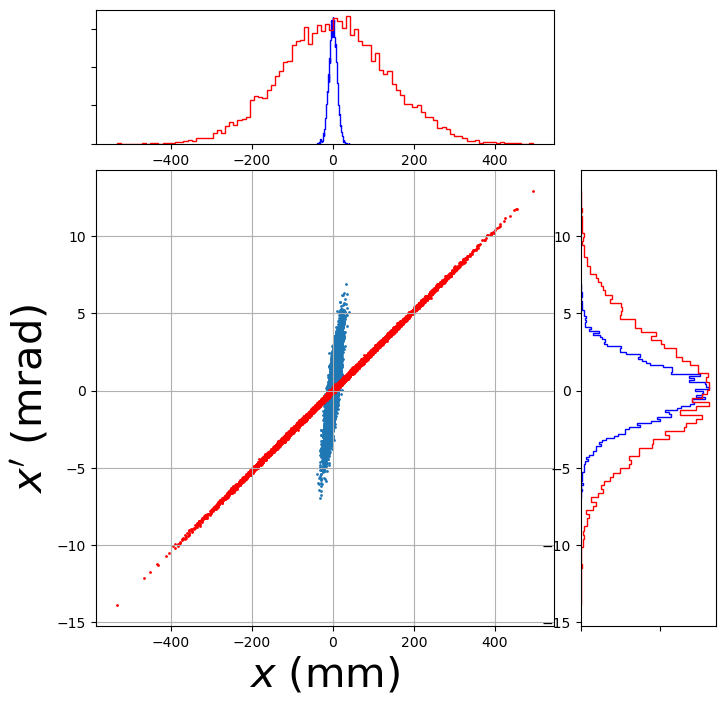

In [310]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

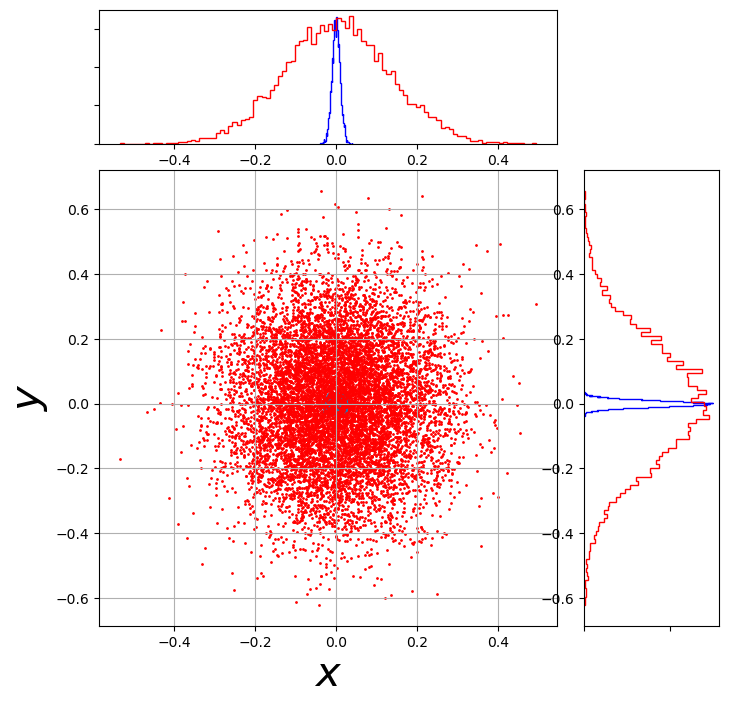

In [311]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Diagnostics

### Update Twiss Parameters

In [312]:
d1 = Drift("d1", "drift", 5) #, aperture=['circular', 1e-1])
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2) #, aperture=['circular', 5e-2])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2) #, aperture=['circular', 5e-2])
m1 = Marker("m1", "marker") #, aperture=['circular', 1e-1])

In [313]:
fodo_list = [qf, d1, qd, d1, m1]

In [314]:
fodo = Beamline("fodo", fodo_list)

In [315]:
fodo.get_num_beamline_elements()

5

In [316]:
fodo.print_beamline()

   qf quadrupole  0.400  1.200  0.400
   d1      drift  5.000  0.000  5.400
   qd quadrupole  0.400 -1.200  5.800
   d1      drift  5.000  0.000 10.800
   m1     marker  0.000  0.000 10.800


In [317]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [318]:
particles = bunch.generate_transverse_matched_beam_distribution()
x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

In [319]:
bunch.twiss_x

[-1.5, 10, 9.896801347894918e-06]

In [320]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.896801347894918e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.98159585851434e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [321]:
fodo.propagate_beamline(bunch)

         0         qf quadrupole    0.40000    0.40000      10000/     10000    9.89680    9.98160
         1         d1      drift    5.00000    5.40000      10000/     10000    9.89680    9.98160
         2         qd quadrupole    0.40000    5.80000      10000/     10000    9.89680    9.98160
         3         d1      drift    5.00000   10.80000      10000/     10000    9.89680    9.98160
         4         m1     marker    0.00000   10.80000      10000/     10000    9.89680    9.98160


In [322]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 244.02683540767742 m
alpha_x                   : -38.42939226775982 m^(1/2)
emittance_x               : 9.896801347895956e-06 mm-mrad
beta_y                    : 48.813709554289034 m
alpha_y                   : -21.33254176263737 m^(1/2)
emittance_y               : 9.981595858513495e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 10.8


In [323]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

In [324]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 244.02683540767742 m
alpha_x                   : -38.42939226775982 m^(1/2)
emittance_x               : 9.896801347895956e-06 mm-mrad
beta_y                    : 48.813709554289034 m
alpha_y                   : -21.33254176263737 m^(1/2)
emittance_y               : 9.981595858513495e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 10.8


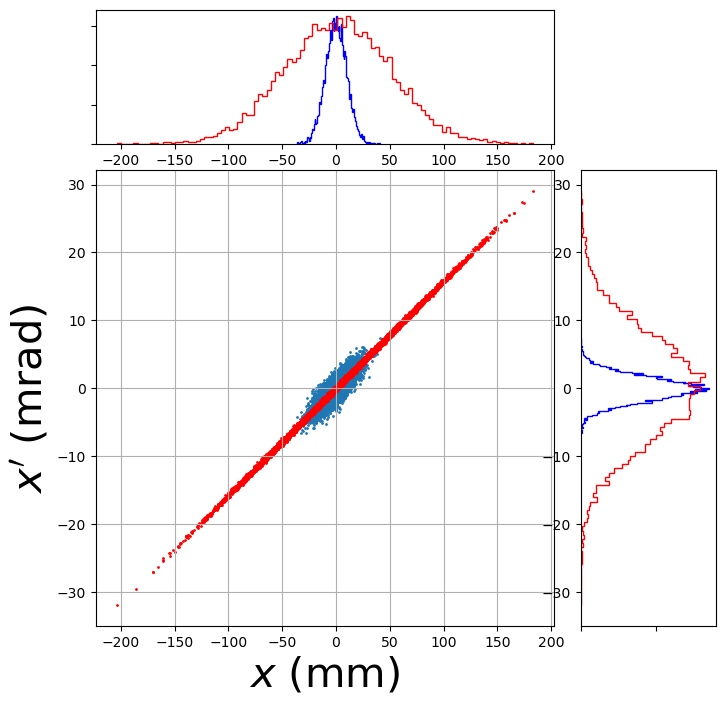

In [325]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

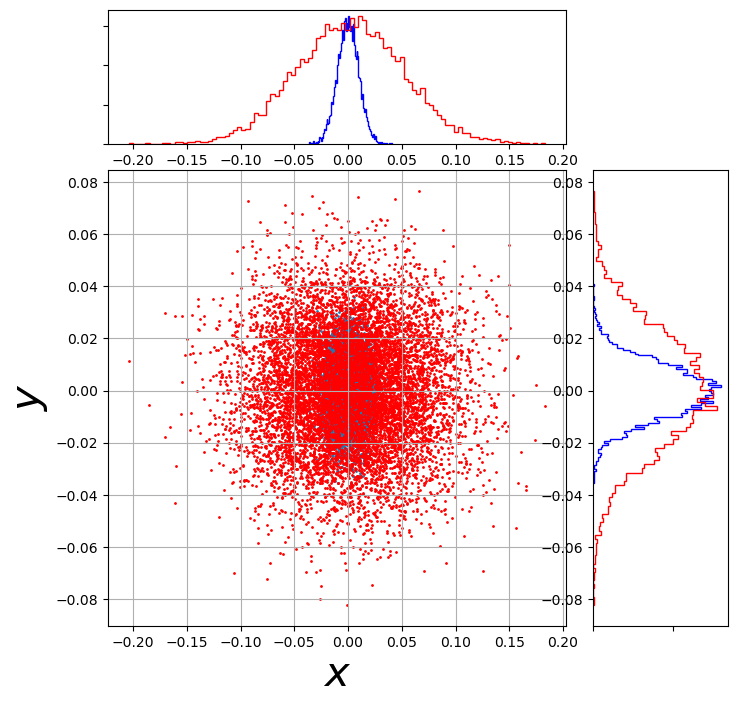

In [326]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Particle Diagnostics

In [327]:
import tables
import numpy as np
import os
from matplotlib import pyplot as plt

In [328]:
from elements import *
from beamline import Beamline
from beam import Bunch
from utils import diagnostics

In [329]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [330]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [331]:
if os.path.exists("particle.h5"):
    os.remove("particle.h5")

In [332]:
pdiagnostics = diagnostics.Particle_diagnostics("particle.h5")

In [333]:
pdiagnostics.save_particle_diagnostics(bunch.particle)

In [334]:
h5file = tables.open_file("particle.h5")

In [335]:
h5file.root.particle

/particle (Group) 'particle data'
  children := ['beta' (Array), 'charge' (Array), 'energy' (Array), 'gamma' (Array), 'mass' (Array), 'momentum' (Array), 'species' (Array)]

In [336]:
for i in h5file.root.particle:
    if i.name == "species":
        print ("%10s %10s" % (i.name, i.read()[0])) #.decode('ASCII')))
    else:
        print ("%10s %10.5f" % (i.name, i.read()))

      beta    0.99882
    charge   -1.00000
    energy   10.00000
     gamma   20.56951
      mass    0.51100
  momentum    9.98694
   species b'electron'


In [337]:
h5file.close()

### Bunch Diagnostics

In [338]:
if os.path.exists("bunch.h5"):
    os.remove("bunch.h5")

In [339]:
bdiagnostics = diagnostics.Bunch_diagnostics("bunch.h5")

In [340]:
bdiagnostics.save_bunch_diagnostics(bunch)

In [341]:
h5file = tables.open_file("bunch.h5")

In [342]:
h5file.root

/ (RootGroup) 'Bunch Data'
  children := ['diagnostics' (Group), 'twiss' (Group), 'particles' (Array)]

In [343]:
h5file.root.particles.read()

array([[ 0.00666713,  0.00601393, -0.00520437, ...,  0.00327537,
         0.01272418,  0.00249554],
       [ 0.00015732,  0.00132687,  0.00095295, ...,  0.00042006,
         0.00299127,  0.00083199],
       [ 0.00315186, -0.00281643, -0.00490939, ...,  0.00633096,
         0.00556117,  0.00709533],
       [-0.0006512 ,  0.00060024,  0.00038988, ..., -0.00072139,
        -0.00109288, -0.0009653 ]])

In [344]:
h5file.root.diagnostics

/diagnostics (Group) 'Bunch diagnostics data'
  children := ['num_particles' (Array), 'std_x' (Array), 'std_xp' (Array), 'std_y' (Array), 'std_yp' (Array)]

In [345]:
for i in h5file.root.diagnostics:
    print ("%12s %10.5f" % (i.name, i.read()))

num_particles 10000.00000
       std_x    0.01002
      std_xp    0.00179
       std_y    0.00997
      std_yp    0.00180


In [346]:
h5file.root.twiss

/twiss (Group) 'Twiss data'
  children := ['alpha_x' (Array), 'alpha_y' (Array), 'beta_x' (Array), 'beta_y' (Array), 'emit_x' (Array), 'emit_y' (Array)]

In [347]:
for i in h5file.root.twiss:
    print ("%12s %10.5f" % (i.name, i.read()))

     alpha_x   -1.50000
     alpha_y    1.50000
      beta_x   10.00000
      beta_y   10.00000
      emit_x    0.00001
      emit_y    0.00001


In [348]:
h5file.close()

## Beamline Diagnostics

In [349]:
from elements import *
from beamline import Beamline
from beam import Bunch
from matplotlib import pyplot as plt
from utils import diagnostics
import os
from tables import *

In [350]:
if os.path.exists("beamline.h5"):
    os.remove("beamline.h5")

In [351]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [352]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [353]:
d1 = Drift("d1", "drift", 5, aperture=['circular', 1e-1])
b1 = Sbend("b1", "sbend", 1.5, 22.5, aperture=['circular', 1e-1])
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2, aperture=['circular', 1e-1])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2, aperture=['circular', 1e-1])
m1 = Marker("m1", "marker", aperture=['circular', 1e-1])

In [354]:
fodo_list = [qf, d1, b1, d1, qd, d1, b1, d1, m1]

In [355]:
fodo = Beamline("fodo", fodo_list)

In [356]:
bldiagnostics = diagnostics.Beamline_diagnostics("beamline.h5")

In [357]:
bldiagnostics

In [358]:
bldiagnostics.save_bunch_diagnostics(bunch)

In [359]:
h5file = open_file("beamline.h5")

In [360]:
h5file.root

/ (RootGroup) 'Beamline Data'
  children := ['beamline' (Group), 'diagnostics' (Group), 'twiss' (Group)]

In [361]:
h5file.root.beamline.s

/beamline/s (EArray(1,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8192,)

In [362]:
for i in h5file.root.beamline.s:
    print (i)

0.0


In [363]:
h5file.close()

### Beamline Test

In [364]:
if os.path.exists("beamline.h5"):
    os.remove("beamline.h5")

In [365]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [366]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [367]:
fodo2 = Beamline("fodo", fodo_list, True)

In [368]:
fodo2.propagate_beamline(bunch)

         0         qf quadrupole    0.40000    0.40000      10000/     10000    9.89680    9.98160
         1         d1      drift    5.00000    5.40000      10000/     10000    9.89680    9.98160
         2         b1      sbend    1.50000    6.90000       9975/     10000    9.89915    9.85924
         3         d1      drift    5.00000   11.90000       9466/     10000    9.77915    8.64561
         4         qd quadrupole    0.40000   12.30000       9449/     10000    9.68948    8.63972
         5         d1      drift    5.00000   17.30000       5729/     10000    4.92374    7.56791
         6         b1      sbend    1.50000   18.80000       4052/     10000    4.30294    5.50603
         7         d1      drift    5.00000   23.80000       1857/     10000    3.76276    2.70453
         8         m1     marker    0.00000   23.80000       1857/     10000    3.76276    2.70453


In [369]:
h5file = open_file("beamline.h5")

In [370]:
h5file.root

/ (RootGroup) 'Beamline Data'
  children := ['beamline' (Group), 'diagnostics' (Group), 'twiss' (Group)]

In [371]:
h5file.root.beamline.s

/beamline/s (EArray(10,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8192,)

In [372]:
for i in h5file.root.beamline.s:
    print (i)

0.0
0.4
5.4
6.9
11.9
12.3
17.3
18.8
23.8
23.8


In [373]:
for i in h5file.root.twiss.emit_x:
    print (i)

9.896801347894918e-06
9.896801347894901e-06
9.896801347894916e-06
9.899149737079247e-06
9.779148129296378e-06
9.689481264104772e-06
4.923741946080254e-06
4.30294462410813e-06
3.7627637635873167e-06
3.7627637635873167e-06


In [374]:
for i in h5file.root.twiss.beta_x:
    print (i)

10.0
9.300724614618339
7.055530318067579
15.763887749415067
58.12781715086643
75.24321923724224
1001.2668133387202
1292.3593278285514
1707.3766328751396
1707.3766328751396


In [375]:
h5file.root.twiss.beta_x

/twiss/beta_x (EArray(10,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8192,)

In [376]:
h5file.close()

## FODO Lattice Benchmarking

In [377]:
if os.path.exists("beamline.h5"):
    os.remove("beamline.h5")

In [378]:
d1 = Drift("d1", "drift", 0.55) #, aperture=['circular', 1e-1])
b1 = Sbend("b1", "sbend", 1.50, 22.5)
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2) #, aperture=['circular', 5e-2])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2) #, aperture=['circular', 5e-2])
m1 = Marker("m1", "marker", aperture=['circular', 1e-1])

In [379]:
fodo_list = [qf, d1, b1, d1, qd, d1, b1, d1, m1]

In [380]:
fodo = Beamline("fodo", fodo_list, True)

In [381]:
fodo.get_num_beamline_elements()

9

In [382]:
fodo.print_beamline()

   qf quadrupole  0.400  1.200  0.400
   d1      drift  0.550  0.000  0.950
   b1      sbend  1.500 22.500  2.450
   d1      drift  0.550  0.000  3.000
   qd quadrupole  0.400 -1.200  3.400
   d1      drift  0.550  0.000  3.950
   b1      sbend  1.500 22.500  5.450
   d1      drift  0.550  0.000  6.000
   m1     marker  0.000  0.000  6.000


In [383]:
twiss_x = [0, 9.818144678, 3.4187e-6]
twiss_y = [0, 1.237442734, 3.4187e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [384]:
particles = bunch.generate_transverse_matched_beam_distribution()
x = particles[0,:]
xp = particles[1,:]
y = particles[2,:]

In [385]:
bunch.twiss_x

[0, 9.818144678, 3.4308855056629425e-06]

In [386]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 9.818144678 m
alpha_x                   : 0 m^(1/2)
emittance_x               : 3.4308855056629425e-06 mm-mrad
beta_y                    : 1.237442734 m
alpha_y                   : 0 m^(1/2)
emittance_y               : 3.365053423655064e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [387]:
fodo.propagate_beamline(bunch)

         0         qf quadrupole    0.40000    0.40000      10000/     10000    3.43089    3.36505
         1         d1      drift    0.55000    0.95000      10000/     10000    3.43089    3.36505
         2         b1      sbend    1.50000    2.45000      10000/     10000    3.43089    3.36505
         3         d1      drift    0.55000    3.00000      10000/     10000    3.43089    3.36505
         4         qd quadrupole    0.40000    3.40000      10000/     10000    3.43089    3.36505
         5         d1      drift    0.55000    3.95000      10000/     10000    3.43089    3.36505
         6         b1      sbend    1.50000    5.45000      10000/     10000    3.43089    3.36505
         7         d1      drift    0.55000    6.00000      10000/     10000    3.43089    3.36505
         8         m1     marker    0.00000    6.00000      10000/     10000    3.43089    3.36505


In [388]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 56.6332681990393 m
alpha_x                   : -13.732740061298799 m^(1/2)
emittance_x               : 3.4308855056629404e-06 mm-mrad
beta_y                    : 3.79647620950149 m
alpha_y                   : 1.3753018062484874 m^(1/2)
emittance_y               : 3.365053423655062e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 6.0


In [389]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

In [390]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 56.6332681990393 m
alpha_x                   : -13.732740061298799 m^(1/2)
emittance_x               : 3.4308855056629404e-06 mm-mrad
beta_y                    : 3.79647620950149 m
alpha_y                   : 1.3753018062484874 m^(1/2)
emittance_y               : 3.365053423655062e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 6.0


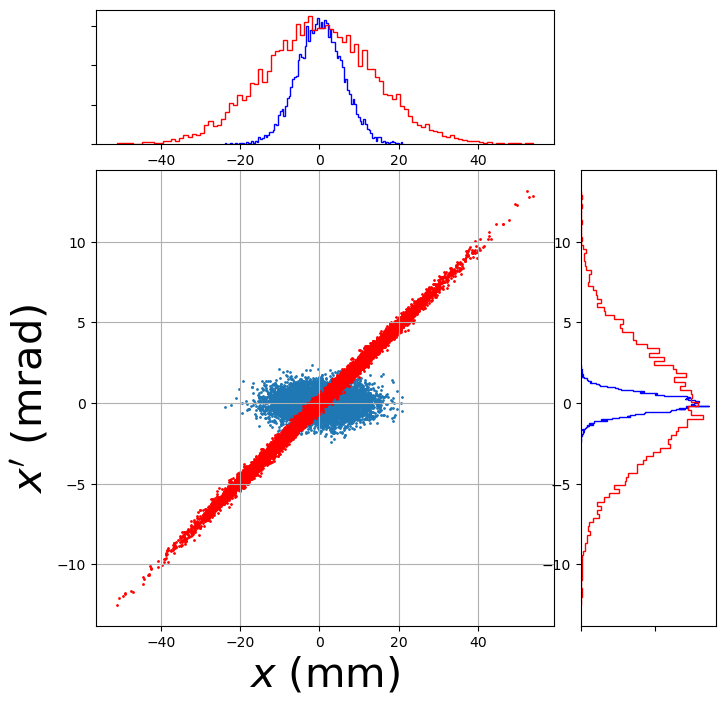

In [391]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

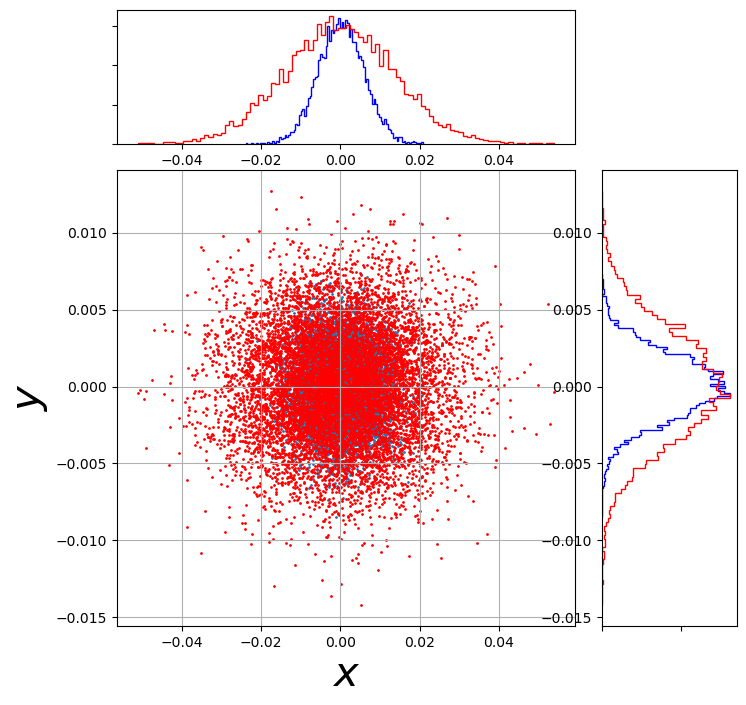

In [392]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### FODO Lattice Benchmarking with Synergia2

In [393]:
h5file = tables.open_file("syn_particles_0000.h5")

In [394]:
syn_particles_x = h5file.root.particles[:,0]
syn_particles_xp = h5file.root.particles[:,1]
syn_particles_y = h5file.root.particles[:,2]

In [395]:
h5file.close()

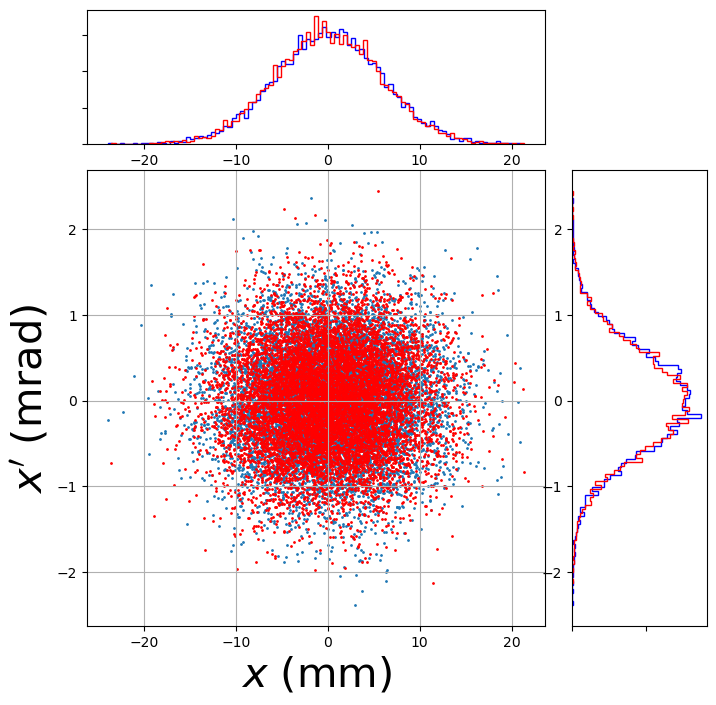

In [396]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(syn_particles_x*1e3, syn_particles_xp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(syn_particles_x*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(syn_particles_xp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

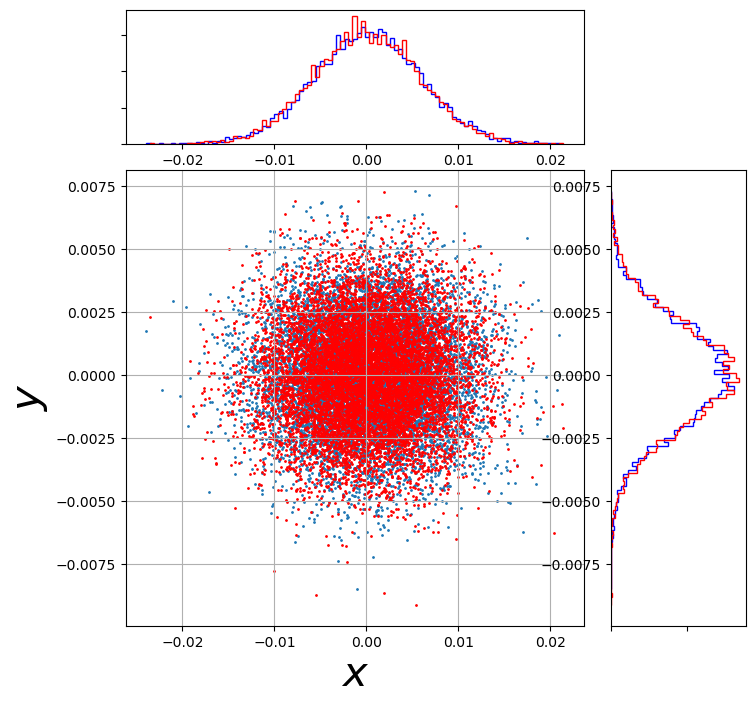

In [397]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(syn_particles_x, syn_particles_y, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(syn_particles_x, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(syn_particles_y, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

In [398]:
h5file = open_file("beamline.h5")

In [399]:
h5file.root

/ (RootGroup) 'Beamline Data'
  children := ['beamline' (Group), 'diagnostics' (Group), 'twiss' (Group)]

In [400]:
s = []
for i in h5file.root.beamline.s:
    s.append(i)
std_x = []
for i in h5file.root.diagnostics.std_x:
    std_x.append(i)
std_y = []
for i in h5file.root.diagnostics.std_y:
    std_y.append(i)
beta_x = []
for i in h5file.root.twiss.beta_x:
    beta_x.append(i)
h5file.close()

In [401]:
h5file = tables.open_file("syn_diagnostics.h5")
syn_s = h5file.root.s_n[:]
syn_x = h5file.root.std[0,:]
syn_y = h5file.root.std[2,:]
h5file.close()

In [402]:
print (len(syn_s), len(syn_x), len(syn_y))

9 9 9


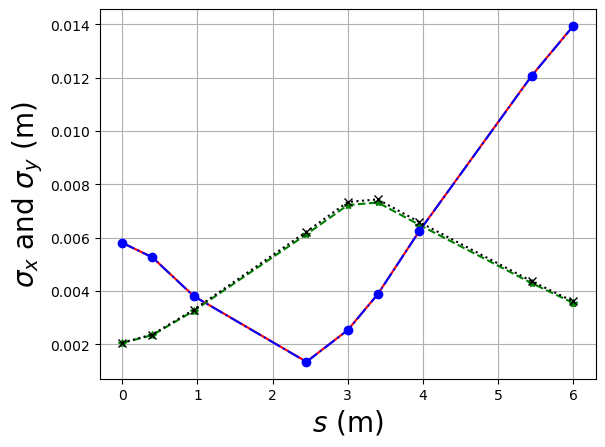

In [403]:
plt.figure(1)

plt.plot(s, std_x, 'r*-')
plt.plot(s, std_y, 'g*--')
plt.plot(syn_s, syn_x, 'bo-.')
plt.plot(syn_s, syn_y, 'kx:')
plt.xlabel(r"$s$ (m)", fontsize=20)
plt.ylabel(r"$\sigma_{x}$ and $\sigma_{y}$ (m)", fontsize=20)
plt.grid(1)
plt.show()

In [404]:
h5file = tables.open_file("syn_twiss.h5")
syn_s = h5file.root.s[:]
syn_beta_x = h5file.root.beta_x[:]
h5file.close()

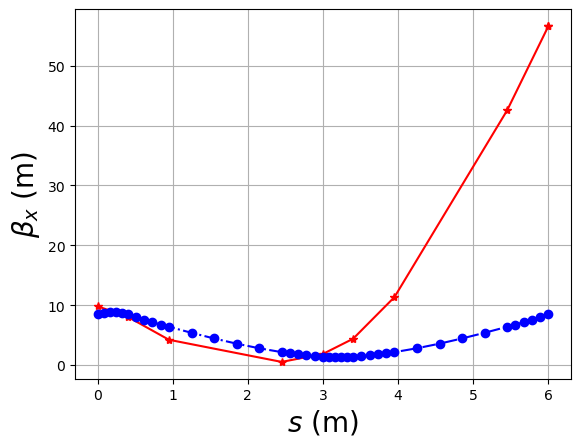

In [405]:
plt.figure(1)

plt.plot(s, beta_x, 'r*-')
plt.plot(syn_s, syn_beta_x, 'bo-.')
plt.xlabel(r"$s$ (m)", fontsize=20)
plt.ylabel(r"$\beta_{x}$ (m)", fontsize=20)
plt.grid(1)
plt.show()